In [49]:
import os
import tifffile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cloudvolume

In [14]:
ex_vol_file_path = '/n/data3_vast/hms/neurobio/htem2/users/kd193/spinal_cord_embedding/dataset/embeddings_inf/inference/cutouts/533817_110500_38403.tiff'
ex_vol = tifffile.imread(ex_vol_file_path)
ex_vol.shape

(129, 129, 129)

In [50]:
em_spinalcord = cloudvolume.CloudVolume("precomputed://gs://lee-mouse-spinal-cord-001-raw/sharded", use_https=True, fill_missing=True, mip=(32,32,45), progress=False)

In [59]:
ex_vol = em_spinalcord[50000:50129, 10000:10129, 3000:3129][:,:,:,0].transpose()

In [110]:
sst_em_spinalcord = cloudvolume.CloudVolume("precomputed://gs://lee-mouse-spinal-cord-001-raw/dorsalhorn_trpm8", use_https=True, fill_missing=True, mip=(32,32,45), progress=False)
sst_ex_vol = sst_em_spinalcord[15000:15129, 5000:5129, 200:329][:,:,:,0].transpose()

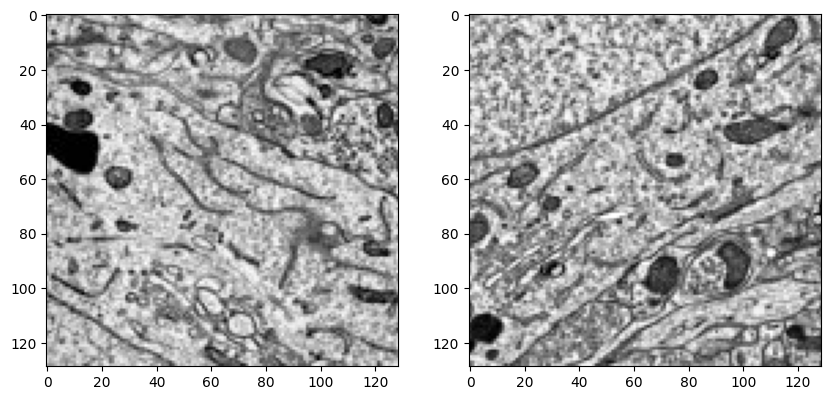

In [111]:
fig, axs = plt.subplots(1,2, figsize=(10,20))
axs[0].imshow(ex_vol[0], cmap='gray')
axs[1].imshow(sst_ex_vol[0], cmap='gray')

Text(0, 0.5, 'Frequency')

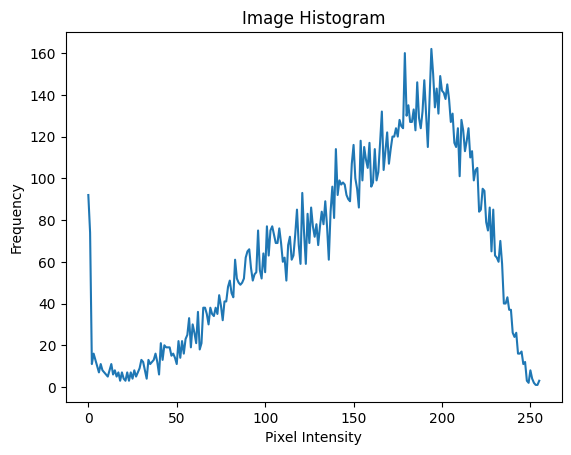

In [117]:
histogram, bin_edges = np.histogram(ex_vol[0].ravel(), bins=256, range=(0, 256)) # cltmr dataset
plt.plot(histogram)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

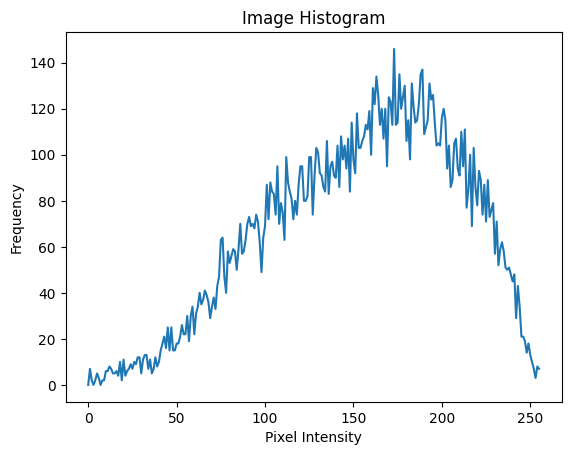

In [116]:
histogram, bin_edges = np.histogram(sst_ex_vol[0].ravel(), bins=256, range=(0, 256)) #trpm8
plt.plot(histogram)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [118]:
from skimage.exposure import match_histograms
normalized_volume = match_histograms(sst_ex_vol, ex_vol)

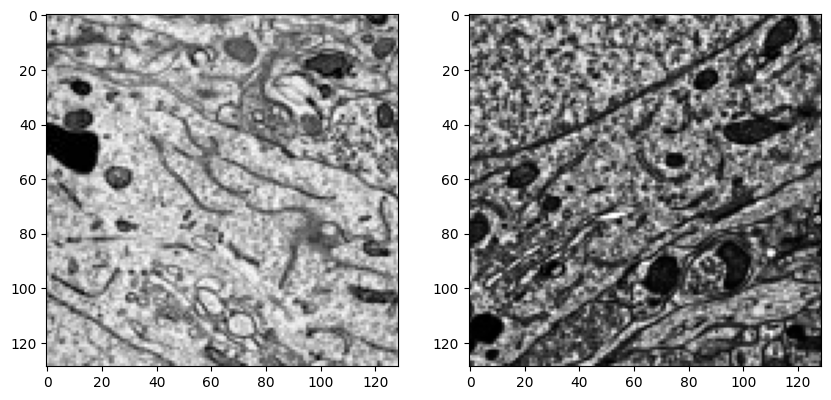

In [119]:
fig, axs = plt.subplots(1,2, figsize=(10,20))
axs[0].imshow(ex_vol[0], cmap='gray')
axs[1].imshow(normalized_volume[0], cmap='gray')

Text(0, 0.5, 'Frequency')

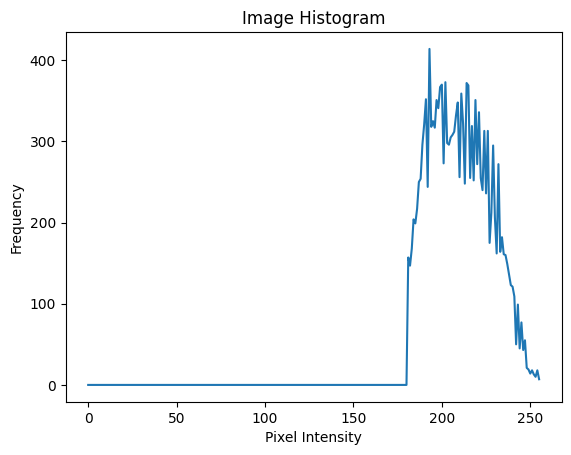

In [121]:
histogram, bin_edges = np.histogram(normalized_volume[0].ravel(), bins=256, range=(0, 256)) #trpm8
plt.plot(histogram)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [122]:
normalized_volume.min
()

255.0

In [73]:
import numpy as np
import cv2

def apply_clahe_masked(volume, clip_limit=2.0, tile_grid_size=(8, 8), axis=0):
    """
    Apply CLAHE to a masked 3D volume, enhancing only the foreground (nonzero regions).
    
    Args:
        volume (np.ndarray): 3D input volume.
        clip_limit (float): CLAHE contrast limit.
        tile_grid_size (tuple): CLAHE grid size.
        axis (int): Axis along which to apply CLAHE (0=z, 1=y, 2=x).

    Returns:
        np.ndarray: CLAHE-enhanced 3D volume.
    """
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    enhanced_volume = np.copy(volume)  # Copy original volume
    
    for i in range(volume.shape[axis]):
        slice_data = volume[i,:,:]
        slice_data_norm = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min() + 1e-8)
        slice_data_clahe = clahe.apply(slice_data_norm)
        enhanced_volume[i, :, :] = slice_data_clahe


    return enhanced_volume, mask


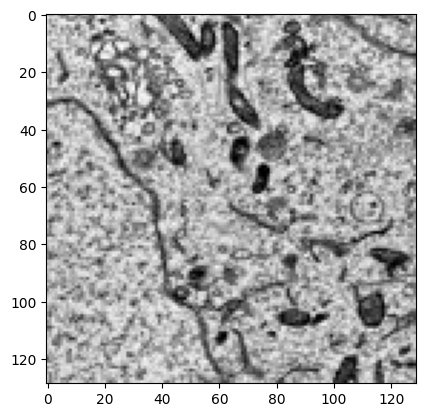

In [78]:
plt.imshow(ex_vol[67], cmap='gray')

In [76]:
ex_vol_fixed = (ex_vol - ex_vol.min()) / (ex_vol.max() - ex_vol.min() + 1e-8)

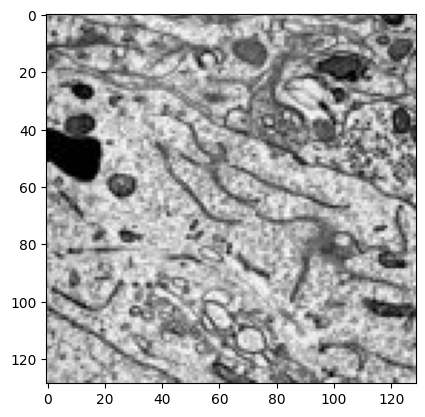

In [95]:
plt.imshow(ex_vol_fixed[0], cmap='gray')

In [92]:
volume = ex_vol_fixed

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_vol = np.zeros_like(volume).astype(np.float32)

for i in range(volume.shape[0]):
    slice_data_norm = volume[i,:,:]
    slice_data_clahe = clahe.apply((slice_data_norm*255).astype(np.uint8)) / 255.0
    clahe_vol[i, :, :] = slice_data_clahe

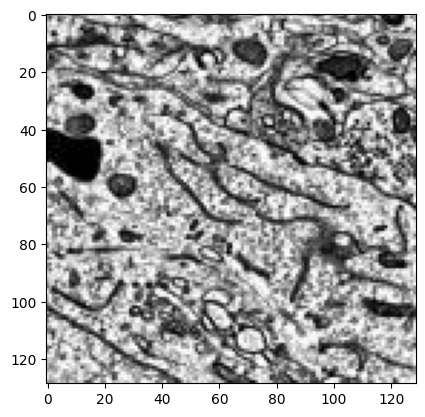

In [94]:
plt.imshow(clahe_vol[0], cmap='gray')

In [ ]:
from skimage.exposure import match_histograms
normalized_volume = match_histograms(new_volume, reference_volume)